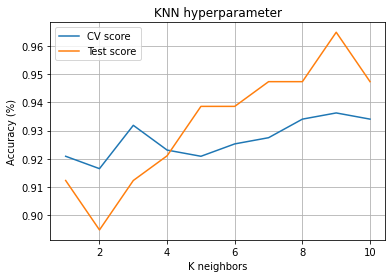

In [6]:
# Number of nearest K neighbors: N_NEIGHBORS

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

dx, dy = load_breast_cancer(return_X_y = True)
dx_train, dx_test, dy_train, dy_test = train_test_split(dx, dy, test_size = 0.2, random_state = 0)

cv_scores = []
test_scores = []
x = np.arange(10) + 1

for k in x:
    knn = KNeighborsClassifier(n_neighbors = k).fit(dx_train, dy_train)
    cv_scores.append(cross_val_score(knn, dx_train, dy_train, cv = 5).mean())
    test_scores.append(knn.score(dx_test, dy_test))

plt.title('KNN hyperparameter')
plt.plot(x, cv_scores, label = 'CV score')
plt.plot(x, test_scores, label = 'Test score')
plt.xlabel('K neighbors')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# Use GRIDSEARCHCV to automatically search for the best K value

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

dx, dy = load_breast_cancer(return_X_y = True)
dx_train, dx_test, dy_train, dy_test = train_test_split(dx, dy, test_size = 0.2, random_state = 0)

param_grid = {'n_neighbors': np.arange(10) + 1}
model = GridSearchCV(KNeighborsClassifier(), param_grid)
model.fit(dx_train, dy_train)

print('Best params: ', model.best_params_)
print('CV Score: ', round(model.best_score_, 3))
print('Test score: ', round(model.score(dx_test, dy_test), 3))

Best params:  {'n_neighbors': 9}
CV Score:  0.936
Test score:  0.965


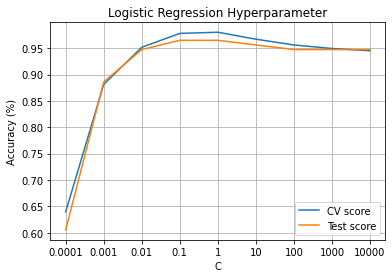

In [10]:
# C for Logistic Regression: Normalization Strength

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

dx, dy = load_breast_cancer(return_X_y = True)
dx_std = StandardScaler().fit_transform(dx)
dx_train, dx_test, dy_train, dy_test = train_test_split(dx_std, dy, test_size = 0.2, random_state = 0)

cv_scores = []
test_scores = []
x = [10 ** n for n in range(-4, 5)]
x_str = [str(n) for n in x]

for c in x:
    log_reg = LogisticRegression(C = c, max_iter = 1000).fit(dx_train, dy_train)
    cv_scores.append(cross_val_score(log_reg, dx_train, dy_train, cv = 5).mean())
    test_scores.append(log_reg.score(dx_test, dy_test))

plt.title('Logistic Regression Hyperparameter')
plt.plot(x_str, cv_scores, label = 'CV score')
plt.plot(x_str, test_scores, label = 'Test score')
plt.xlabel('C')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)
plt.show()

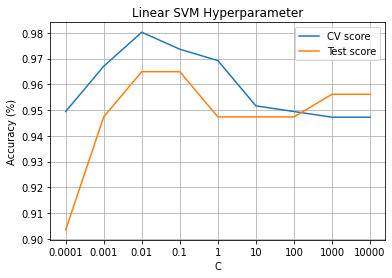

In [27]:
# C of Linear SVC: Normalized Strength

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import LinearSVC
import numpy as np
import matplotlib.pyplot as plt

dx, dy = load_breast_cancer(return_X_y = True)
dx_std = StandardScaler().fit_transform(dx)
dx_train, dx_test, dy_train, dy_test = train_test_split(dx_std, dy, test_size = 0.2, random_state = 0)

cv_scores = []
test_scores = []
x = [10 ** n for n in range(-4, 5)]
x_str = [str(n) for n in x]

for c in x:
    linear_svc = LinearSVC(C=c, max_iter = 10000).fit(dx_train, dy_train)
    cv_scores.append(cross_val_score(linear_svc, dx_train, dy_train, cv=5).mean())
    test_scores.append(linear_svc.score(dx_test, dy_test))

plt.title('Linear SVM Hyperparameter')
plt.plot(x_str, cv_scores, label = 'CV score')
plt.plot(x_str, test_scores, label = 'Test score')
plt.xlabel('C')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
# C, GAMMA and KERNEL parameters

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import matplotlib.pyplot as plt

dx, dy = load_breast_cancer(return_X_y = True)
dx_std = StandardScaler().fit_transform(dx)
dx_train, dx_test, dy_train, dy_test = train_test_split(dx_std, dy, test_size = 0.2, random_state = 0)

x = [10 ** n for n in range(-4, 5)]

param_grid = {
    'C': x,
    'gamma': x,
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

model = GridSearchCV(SVC(), param_grid)
model.fit(dx_train, dy_train)

print('Best params: ', model.best_params_)
print('CV Score: ', round(model.best_score_, 3))
print('Test score: ', round(model.score(dx_test, dy_test), 3))

Best params:  {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
CV Score:  0.982
Test score:  0.982


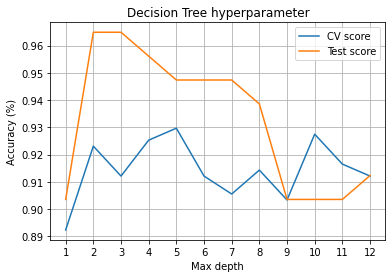

In [23]:
# Maximum depth of decision tree: MAX_DEPTH

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt

dx, dy = load_breast_cancer(return_X_y = True)
dx_std = StandardScaler().fit_transform(dx)
dx_train, dx_test, dy_train, dy_test = train_test_split(dx_std, dy, test_size = 0.2, random_state = 0)

cv_scores = []
test_scores = []
x = np.arange(12) + 1
x_str = [str(n) for n in x]

for d in x:
    tree = DecisionTreeClassifier(max_depth = d).fit(dx_train, dy_train)
    cv_scores.append(cross_val_score(tree, dx_train, dy_train, cv = 5).mean())
    test_scores.append(tree.score(dx_test, dy_test))

plt.title('Decision Tree hyperparameter')
plt.plot(x_str, cv_scores, label = 'CV score')
plt.plot(x_str, test_scores, label = 'Test score')
plt.xlabel('Max depth')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)
plt.show()

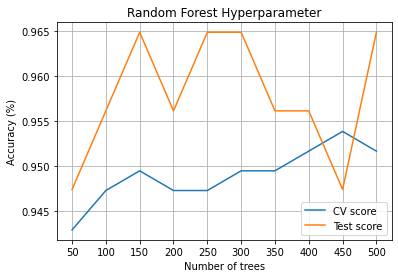

In [26]:
# Random forest size N_ESTIMATORS and random seed RANDOM_STATE

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import matplotlib.pyplot as plt

dx, dy = load_breast_cancer(return_X_y = True)
dx_std = StandardScaler().fit_transform(dx)
dx_train, dx_test, dy_train, dy_test = train_test_split(dx_std, dy, test_size = 0.2, random_state = 0)

cv_scores = []
test_scores = []
x = (np.arange(10) + 1) * 50
x_str = [str(n) for n in x]

for t in x:
    tree = RandomForestClassifier(n_estimators = t, max_depth = 3, random_state = 0)
    tree.fit(dx_train, dy_train)
    cv_scores.append(cross_val_score(tree, dx_train, dy_train, cv = 5).mean())
    test_scores.append(tree.score(dx_test, dy_test))

plt.title('Random Forest Hyperparameter')
plt.plot(x_str, cv_scores, label = 'CV score')
plt.plot(x_str, test_scores, label = 'Test score')
plt.xlabel('Number of trees')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)
plt.show()